### Visualizing RNA-Protein Interactions: A Genomic Data Analysis Project

In the field of bioinformatics, visualizing complex genomic data is crucial. This project, titled "DVisualizing RNA-Protein Interactions: A Genomic Data Analysis Project" merges data science with genomics using Python, focusing on visualizing interactions between RNA binding proteins (RBPs) and genomic annotations. Utilizing Matplotlib and Pandas in a Jupyter notebook, I aim to uncover patterns within artificial genomic datasets, emphasizing RBP signals.

RBPs are key in regulating gene expression post-transcriptionally, influencing processes such as splicing and mRNA stabilization. Given the complexity of genomic data, visualization is essential for identifying trends and forming hypotheses. This project recreates three visualizations to illustrate different aspects of the same data, showcasing the power of data visualization in genomics research.

In [11]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
from itertools import cycle
import seaborn as sns

In [5]:

# Load the required dataset
signals_df = pd.read_csv('10_project_data_signals.csv')
annotations_df = pd.read_csv('10_project_data_annotation.csv')
scatter_data = pd.read_csv('10_project_data_scatter.csv')
bar_data = pd.read_csv('10_project_data_barplot.csv')
with open('10_project_data_dna_sequences.txt', 'r') as file:
    dna_sequences = [line.strip() for line in file]
# Verticale line points used in many plots (used to draw vertical lines in specific positions)
vertical_lines_x = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]

## 1: Visualization Exercises

In [6]:
# As the annotation has been used many times, this function will help add it anywhere required
# The color for annotation is sent as parameter
def addAnnotationSubplot(ax, annotations_df, color):
    genes = ['geneA', 'geneB', 'geneC']
    # Iterate over the genes
    for gene in genes:
        # Filter the data for the gene
        gene_data = annotations_df[annotations_df['name'] == gene]

        # Determine the strand label for the gene
        strand_label = gene_data['strand'].values[0]

        # Transcripts with '+' strand of the DNA
        if strand_label == '+':
            # This code adds plots two lines with a width of 14 on two heads of a straight line  
            # as min and max for + strands

            # The min point (minimum)
            ax.hlines(2, gene_data['start'].min(), gene_data['start'].min() + 40, linewidth=14, colors=color,
                      label='Transcripts')
            # The straight line 
            ax.hlines(2, gene_data['start'].min(), gene_data['stop'].max(), linewidth=2, colors=color,
                      label='Transcripts')
            # The max point (maximum)
            ax.hlines(2, gene_data['stop'].max() - 40, gene_data['stop'].max(), linewidth=14, colors=color,
                      label='Transcripts')

            # Placing rectangles on the line 
            for _, row in gene_data[gene_data['type'] == 'exon'].iterrows():
                rect = Rectangle((row['start'], 1.9), row['stop'] - row['start'], 0.2, facecolor=color)
                ax.add_patch(rect)
        
        # Transcripts with '-' strand of the DNA            
        elif strand_label == '-':
            # This code adds plots two lines with a width of 14 on two heads of a straight line  
            # as min and max for - strand

            # The min point (minimum)
            ax.hlines(1, gene_data['start'].min(), gene_data['start'].min() + 40, linewidth=14, colors=color,
                      label='Transcripts')
            # The straight line    
            ax.hlines(1, gene_data['start'].min(), gene_data['stop'].max(), linewidth=2, colors=color,
                      label='Transcripts')
            # The max point (maximum)
            ax.hlines(1, gene_data['stop'].max() - 40, gene_data['stop'].max(), linewidth=14, colors=color,
                      label='Transcripts')

            # Placing rectangles on the line 
            for _, row in gene_data[gene_data['type'] == 'exon'].iterrows():
                rect = Rectangle((row['start'], 0.9), row['stop'] - row['start'], 0.2, facecolor=color)
                ax.add_patch(rect)
    # Range fpr yticks 1 - 2        
    ax.set_yticks([1, 2])
    # Lables for yticks - and +
    ax.set_yticklabels(['-', '+'], fontsize=15)
    # Set the y-axis label
    ax.set_ylabel('Annotation', fontsize=12)
    ax.set_xlabel('Genomic Position', fontsize=12)
    ax.set_xlim(0, 20000)
    # Set the y-axis limit
    ax.set_ylim(0.5, 2.5)
   

### 1.1: Version 1

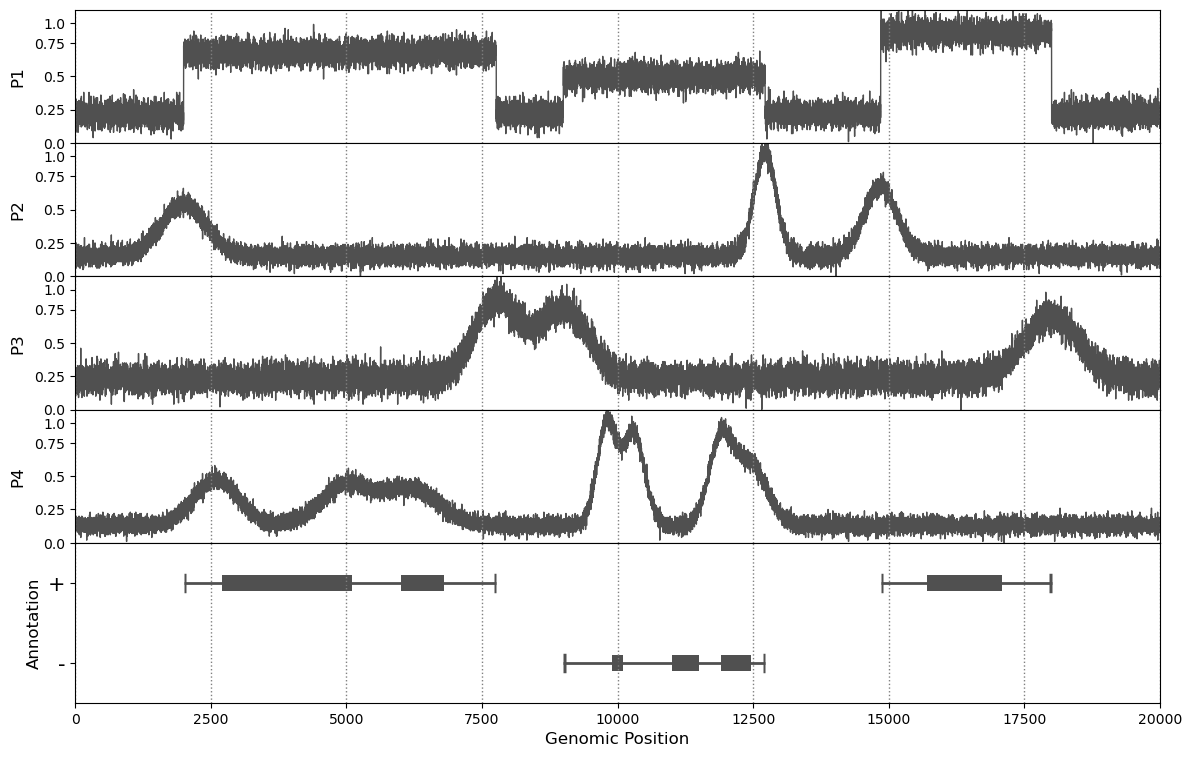

In [8]:

# Create the figure and gridspec
fig = plt.figure(figsize=(14, 9))
gs  = gridspec.GridSpec(5, 1, height_ratios=[1, 1, 1, 1, 1.2])  
labels = ['P1', 'P2', 'P3', 'P4']
# Loop that adds subplots for 'P1', 'P2', ...
for i, column_name in enumerate(labels):
    data = signals_df[column_name]
    ax = plt.subplot(gs[i])
    ax.plot(data, color='#505050', linewidth=1)
    ax.axhline(0, color='black', linewidth=0.5) 
    ax.axhline(1, color='black', linewidth=0.5)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, len(data))
    # Preventing the yticks from crossing each other
    if (i == 'P1'):
        # (1 will be shown in position 1)
        ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    else:
        #(1 will be shown in position 0.9)
        ax.set_yticks([0, 0.25, 0.5, 0.75, 0.9])
    ax.set_yticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'])
    # Removing x-axis ticks
    ax.set_xticks([])       
    # Removing x-axis ticklabels (setting empty)
    ax.set_xticklabels([]) 
    # Adding lables for each row (P1, ...)
    ax.text(-0.06, 0.5, column_name, transform=ax.transAxes, fontsize=12, va='center', rotation=90)
    # Adding vertical dotted lines
    for line_x in vertical_lines_x:
        ax.axvline(line_x, color='gray', linewidth=1, linestyle='dotted')
# Adding the annotation subplot using the addAnnotationSubplot function
ax1 = plt.subplot(gs[4:])
# Adding vertical dotted lines for the annotation
for line_x in vertical_lines_x:
    ax1.axvline(line_x, color='gray', linewidth=1, linestyle='dotted')
# Adding annotation by calling addAnnotationSubplot function
addAnnotationSubplot(ax1, annotations_df, '#505050')
# Adjust the spacing between plots to 0 to get them connected 
plt.subplots_adjust(hspace=0)

# Show the plot
plt.show()


### 1.2: Version 2

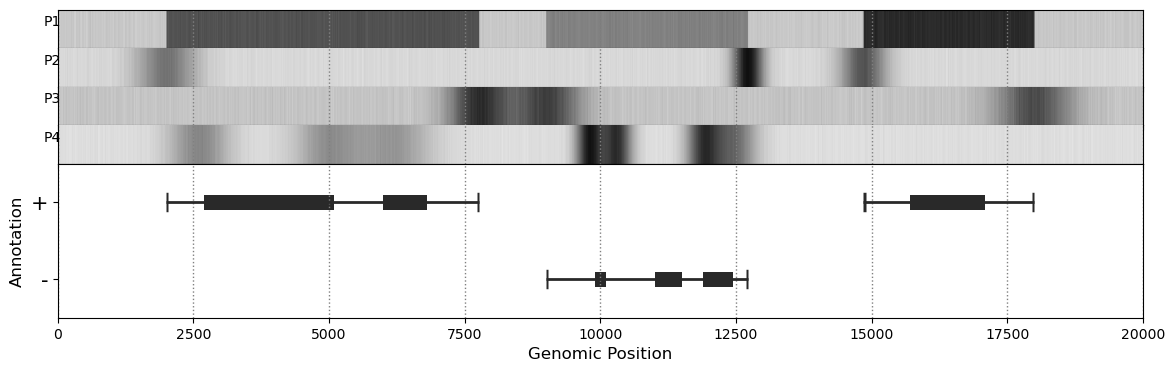

In [9]:

# Getting the column data from 10_project_data_signals.csv
column_names = signals_df.columns[0:]
# Adding colunm names to a list
data_columns = [signals_df[column_name] for column_name in column_names]

# Creating a colormap (black and white)

cmap = plt.cm.binary

# Create the signal graph
fig, axes = plt.subplots(5, 1, gridspec_kw={'height_ratios': [0.5, 0.5, 0.5, 0.5, 2]}, 
                         figsize=(14, 4), sharex=True)
# Exclude the last subplot (ax1) from the loop

for ax, data_column, label in zip(axes[:-1], data_columns, column_names):
    ax.imshow([data_column], cmap=cmap, aspect='auto')
    ax.set_xlabel('')
    ax.set_ylabel(label, rotation = 0)
    ax.set_yticks([])
    if label == 'P1':
        ax.spines['top'].set_visible(True)
    else: 
        ax.spines['top'].set_visible(False)
    for line_x in vertical_lines_x:
        ax.axvline(line_x, color='gray', linewidth=1, linestyle='dotted')
# ax1 used for annotations
# Selecting the last subplot using [-1]
ax1 = axes[-1]
# Adding vertical lines for the last subplot (annotation)
for line_x in vertical_lines_x:
    ax1.axvline(line_x, color='gray', linewidth=1, linestyle='dotted')
# Here we call the addAnnotationSubplot function to add annotation
addAnnotationSubplot(ax1, annotations_df, '#292929')
# Setting the space between subplots to 0
plt.subplots_adjust(hspace = 0)

 #Show the plot
plt.show()


### 1.3: Version 3

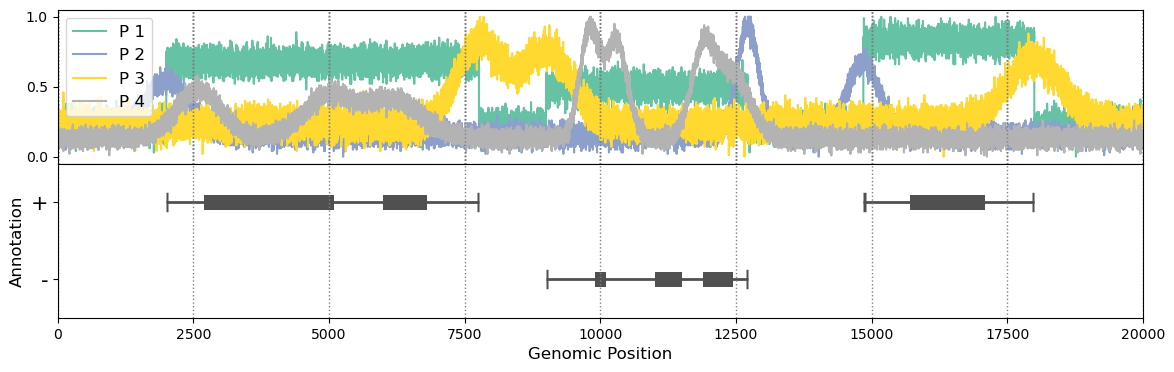

In [12]:
# Define custom colors
custom_colors = ['#66C2A5', '#8DA0CB', '#FFD92F', '#B3B3B3']

# Creating a figure 
plt.figure(figsize=(14, 4))

# Subplot 1
plt.subplot(2, 1, 1)
# Get the current Axes instance
ax = plt.gca()  

# Create a cycle of custom colors
color_cycle = cycle(custom_colors)

# Iterate over each column (from 10_project_data_signals.csv)
for i, column in enumerate(signals_df.columns):
    color = next(color_cycle)  # Get the next color from the cycle
    label = f'P {i+1}'         # Generate a label for the current line
    sns.lineplot(data=signals_df[column], color=color, ax=ax, label=label)
    for line_x in vertical_lines_x:
        ax.axvline(line_x, color='gray', linewidth=1, linestyle='dotted')
        
# Removing x-axis ticks
ax.set_xticks([])
# Setting y-axis ticks from 0 to 1 with an interval of 0.5
ax.set_yticks(np.arange(0, 1.1, 0.5))
# Setting x-axis label
plt.xlabel('Genomic Position')
# Setting y-axis label to an empty string
plt.ylabel('')
# Setting the x-axis limits based on the minimum and maximum values of the 'signals_df' index
plt.xlim(signals_df.index.min(), signals_df.index.max() + 1)
# Setting the legend location to 'upper left' and fontsize to 'large'
plt.legend(loc='upper left', fontsize='large')

# Subplot 2 - Create the second subplot
plt.subplot(2, 1, 2)
ax1 = plt.gca()  # Get the current Axes instance

# Add annotation subplot to the second subplot by calling the function 
addAnnotationSubplot(ax1, annotations_df, '#505050')

# Add vertical dotted lines to the second subplot at specified positions
for line_x in vertical_lines_x:
    ax1.axvline(line_x, color='gray', linewidth=1, linestyle='dotted')

# Adjust the vertical spacing between subplots to 0 to connect them
plt.subplots_adjust(hspace=0)

# Display the plot
plt.show()



### 1.4: Discussion

Version 1: This version offers a clear visualization of RNA binding protein signals through individual subplots, facilitating detailed comparison with corresponding annotations that provide valuable insights into gene locations and exon types. However, comparing all signals simultaneously is challenging due to the grid layout and limited use of color for distinguishing RNA proteins.

Version 2: In this version, all RNA binding protein signal data is consolidated into a single plot, allowing for easy internal comparison of each protein's data. The shared x-axis provides a unified representation of genomic positions, while the binary colormap simplifies the visualization. However, some users ,especially for those unfamiliar with interpreting such plots, may find interpreting this plot more difficult compared to Version 1's separated subplots.

Version 3: This version delivers a colorful and comprehensive representation of RNA binding protein signals and annotations. The first subplot's custom colors enhance visual appeal and aid in identifying trends, while the annotations in the last subplot offer valuable information about gene locations and exon types. This makes it a suitable choice for a comprehensive and visually appealing overview of all RNA proteins.

In conclusion, each version has its distinct strengths and limitations. Version 1 excels in detailed individual protein analysis, Version 2 in quick internal comparisons, and Version 3 in providing a comprehensive representation with vibrant visualizations. The annotations in the last subplots are valuable for understanding gene context. The choice of the best version depends on the specific analysis goals and preferences. 

###  2: Visualization Exercises

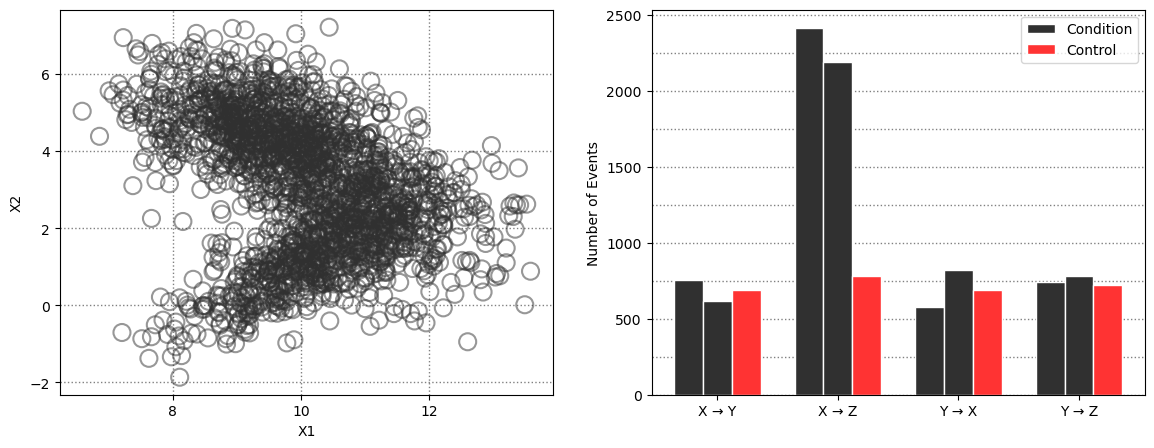

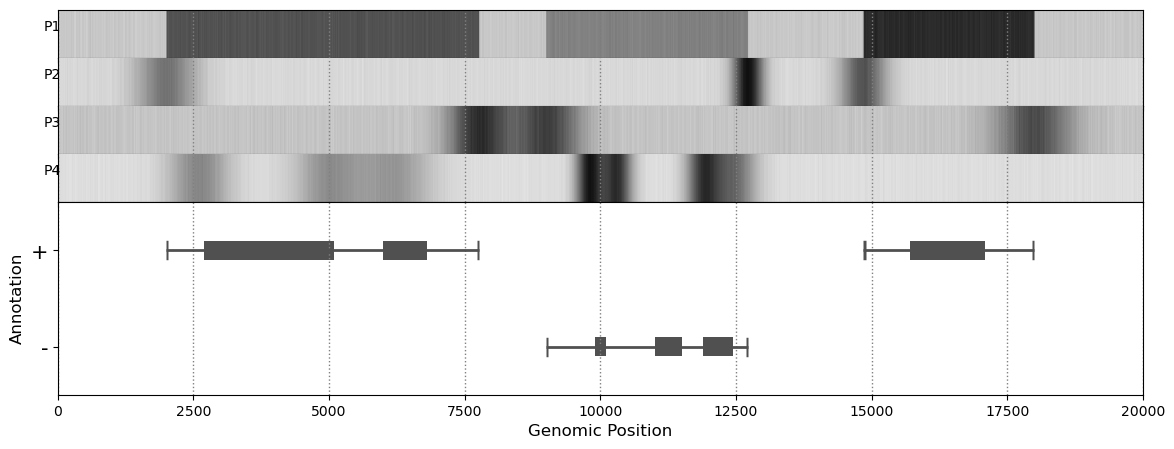

In [13]:

# Load the scatter plot data
x1 = scatter_data['x1']
x2 = scatter_data['x2']

condition_a_sample_1 = bar_data['condition_a_sample_1']
condition_a_sample_2 = bar_data['condition_a_sample_2']
control = bar_data['control']

# Create the figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
ax[0].scatter(x1, x2, marker='o', facecolors='none', edgecolors='#303030', 
                s=150, linewidth=1.5, alpha=0.5) # Change color to red
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].set_xticks([8, 10, 12])

# Bar plot
# Visualizing Bar Plot with Multiple Groups
# Define the labels for the bar plot
ylabels = ['X → Y', 'X → Z', 'Y → X', 'Y → Z']
# Calculate the mean values for each group
horizontal_lines_y = [condition_a_sample_1.mean(), condition_a_sample_2.mean(), control.mean()]
# Generate the x-axis positions for the bars
x = range(len(condition_a_sample_1))
# Define the width of each bar as I used 0.24 
width = 0.24
# Create the bar plot with three groups of bars
ax[1].bar(x, condition_a_sample_1, width, label='Condition', align='center', 
          edgecolor='white', color="#303030")
ax[1].bar([i + width for i in x], condition_a_sample_2, width, label='', 
          align='center', edgecolor='white', color="#303030")
ax[1].bar([i + 2 * width for i in x], control, width, label='Control', 
          align='center', edgecolor='white', color="#FF3333")
# Set the x-axis ticks and labels
ax[1].set_xticks([i + width for i in x])
ax[1].set_xticklabels(x)

# Set the x-axis and y-axis label
ax[1].set_ylabel('Number of Events')
# Set the title and legend for the bar plot
ax[1].legend()

# Set the x-axis tick labels to the defined labels
ax[1].set_xticklabels(ylabels)

# The bar plot will be displayed with three groups of bars, each representing a different condition.

# Adjust spacing between subplots

v_lines_x = [8, 10, 12]

# Adding vertical lines for scatter plot
for line_x in range(8, 13, 2):
    ax[0].axvline(line_x, color='gray', linewidth=1, linestyle='dotted', zorder=0)
# Adding horixantal lines for scatter plot
for line_y in range(-2, 7, 2):
    ax[0].axhline(line_y, color='gray', linewidth=1, linestyle='dotted', zorder=0)
# Adding vertical lines for bar plot
for line_y in range(0, 2501, 250):
    ax[1].axhline(line_y, color='gray', linewidth=1, linestyle='dotted', zorder=0)

    
# Adding annotation to the same plot    
# Get the column data
column_names = signals_df.columns[0:]  # Exclude the first column as it contains the index
data_columns = [signals_df[column_name] for column_name in column_names]

# Create a colormap for black and white
cmap = plt.cm.binary

# Create the signal graph
fig, axes = plt.subplots(5, 1, gridspec_kw={'height_ratios': [0.5, 0.5, 0.5, 0.5, 2]}, 
                         figsize=(14, 5), sharex=True)

for ax, data_column, label in zip(axes[:-1], data_columns, column_names):  
    # Exclude the last subplot (ax1) from the loop
    ax.imshow([data_column], cmap=cmap, aspect='auto')
    ax.set_xlabel('')
    ax.set_ylabel(label, rotation=0)
    ax.set_yticks([])
    if label == 'P1': # Setting spines (top border) for the first row (P1)
        ax.spines['top'].set_visible(True)   
    else: # Removing spines (top border) for the first row (P1) 
        ax.spines['top'].set_visible(False)
    for line_x in vertical_lines_x:
        ax.axvline(line_x, color='gray', linewidth=1, linestyle='dotted')
# ax for annotations
ax1 = axes[-1]
for line_x in vertical_lines_x:
    ax1.axvline(line_x, color='gray', linewidth=1, linestyle='dotted')

addAnnotationSubplot(ax1, annotations_df, '#505050')
plt.subplots_adjust(hspace = 0)

 #Show the plot
plt.show()



### 3: 2-mer Counts In Sequence Data

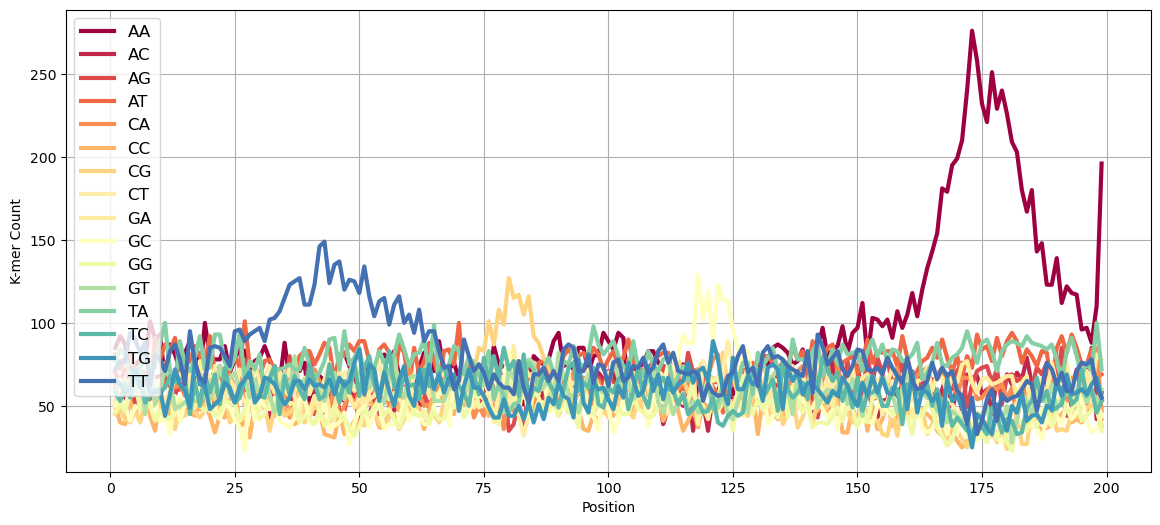

In [14]:
# Function to find all unique 2-mers (k = 2) in the given DNA sequences
def findUnique2mers(dna_sequences):
    unique_kmers = set()
    for dna_seq in dna_sequences:
        for i in range(len(dna_seq) - 1):
            kmer = dna_seq[i:i + 2]     # Extracting each 2-mer from the sequence
            unique_kmers.add(kmer)      # Adding the 2-mer to the set of unique 2-mers
    return sorted(list(unique_kmers))   # Returning the sorted list of unique 2-mers

unique_kmers = findUnique2mers(dna_sequences)

# Function to count the number of occurrences of each 2-mer at each position in the sequences
def countKmers(dna_sequences, unique_kmers):
    k = 2
    num_sequences = len(dna_sequences)
    num_positions = len(dna_sequences[0]) - k + 1

    # Initializing a 2D array to store the frequency of each 2-mer at each position
    frequency = np.zeros((len(unique_kmers), num_positions), dtype=int)

    for i, dna_seq in enumerate(dna_sequences):
        for j in range(num_positions):
            kmer = dna_seq[j:j + k] # Extracting each 2-mer from the current position
            frequency[unique_kmers.index(kmer), j] += 1  # Updating the frequency count for the 2-mer

    return frequency

# Counting the occurrences of each 2-mer at each position in the DNA sequences
frequency = countKmers(dna_sequences, unique_kmers)

# Setting color for each line as there are 16 lines 
line_colors = ['#9E0142', '#C1274A', '#DD4A4C', '#F06744',
               '#F98E52', '#FDB567', '#FED481', '#FEEEAA', 
               '#FEEC9F', '#FFFFBE', '#EFF9A6', '#B1DFA3', 
               '#86CFA5', '#5EB9A9', '#3D95B8', '#4471B2']

# Function to plot the occurrences of the 2-mers per position
def plotKmerFrequency(frequency, unique_kmers):
    fig, ax = plt.subplots(figsize=(14, 6))
    x_values = np.arange(1, frequency.shape[1] + 1)
    
    # Plotting the frequency of each unique k-mer against positions (x_values),
    # using different colors and thicker lines for better visualization.
    for i, kmer in enumerate(unique_kmers):
        ax.plot(x_values, frequency[i, :], label=kmer, color=line_colors[i], linewidth=3)
    
    # Setting y label
    ax.set_ylabel('K-mer Count')
    # Setting x label
    ax.set_xlabel('Position')
    # Legend on the upper left and fotn size is large 
    ax.legend(loc='upper left', fontsize='large')
    # Setting x ticks 
    ax.set_xticks(range(0, 210, 25))
    # Making the grid true 
    plt.grid(True)
    # Showing the plot
    plt.show()

# Plotting the occurrences of the 2-mers per position using
plotKmerFrequency(frequency, unique_kmers)
